# Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that.

In [1]:
!nvidia-smi

Tue Jun  4 04:08:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# import os
# HOME = os.getcwd()
# print(HOME)

# Install YOLOv8

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5643.4/8062.4 GB disk)


In [4]:
from IPython import display
display.clear_output()

from IPython.display import Image
from ultralytics import YOLO

# Preparing a custom dataset

In [5]:
# !mkdir {HOME}/datasets
# %cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="AgRivcdffivrgaoMEErV")
project = rf.workspace("driver-wlf6m").project("driving-monitoring-system")
version = project.version(2)
dataset = version.download("yolov8")

Reason for being yanked: deprecated, use 4.8.0.76
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.1.6 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.2 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflow 2.15.0 requires keras<


Extracting Dataset Version Zip to driving-monitoring-system-2 in yolov8:: 100%|██████████| 49836/49836 [00:06<00:00, 8076.95it/s]


# Custom training

Don't forget to add `resume` parameter so that you can continue your training

In [6]:
# %cd {HOME}

# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True save=True batch=-1

In [7]:
# %cd {HOME}

!yolo task=detect mode=train model=/kaggle/input/driver-management-dataset/best.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True save=True batch=-1 

New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/driver-management-dataset/best.pt, data=/kaggle/working/driving-monitoring-system-2/data.yaml, epochs=100, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, st

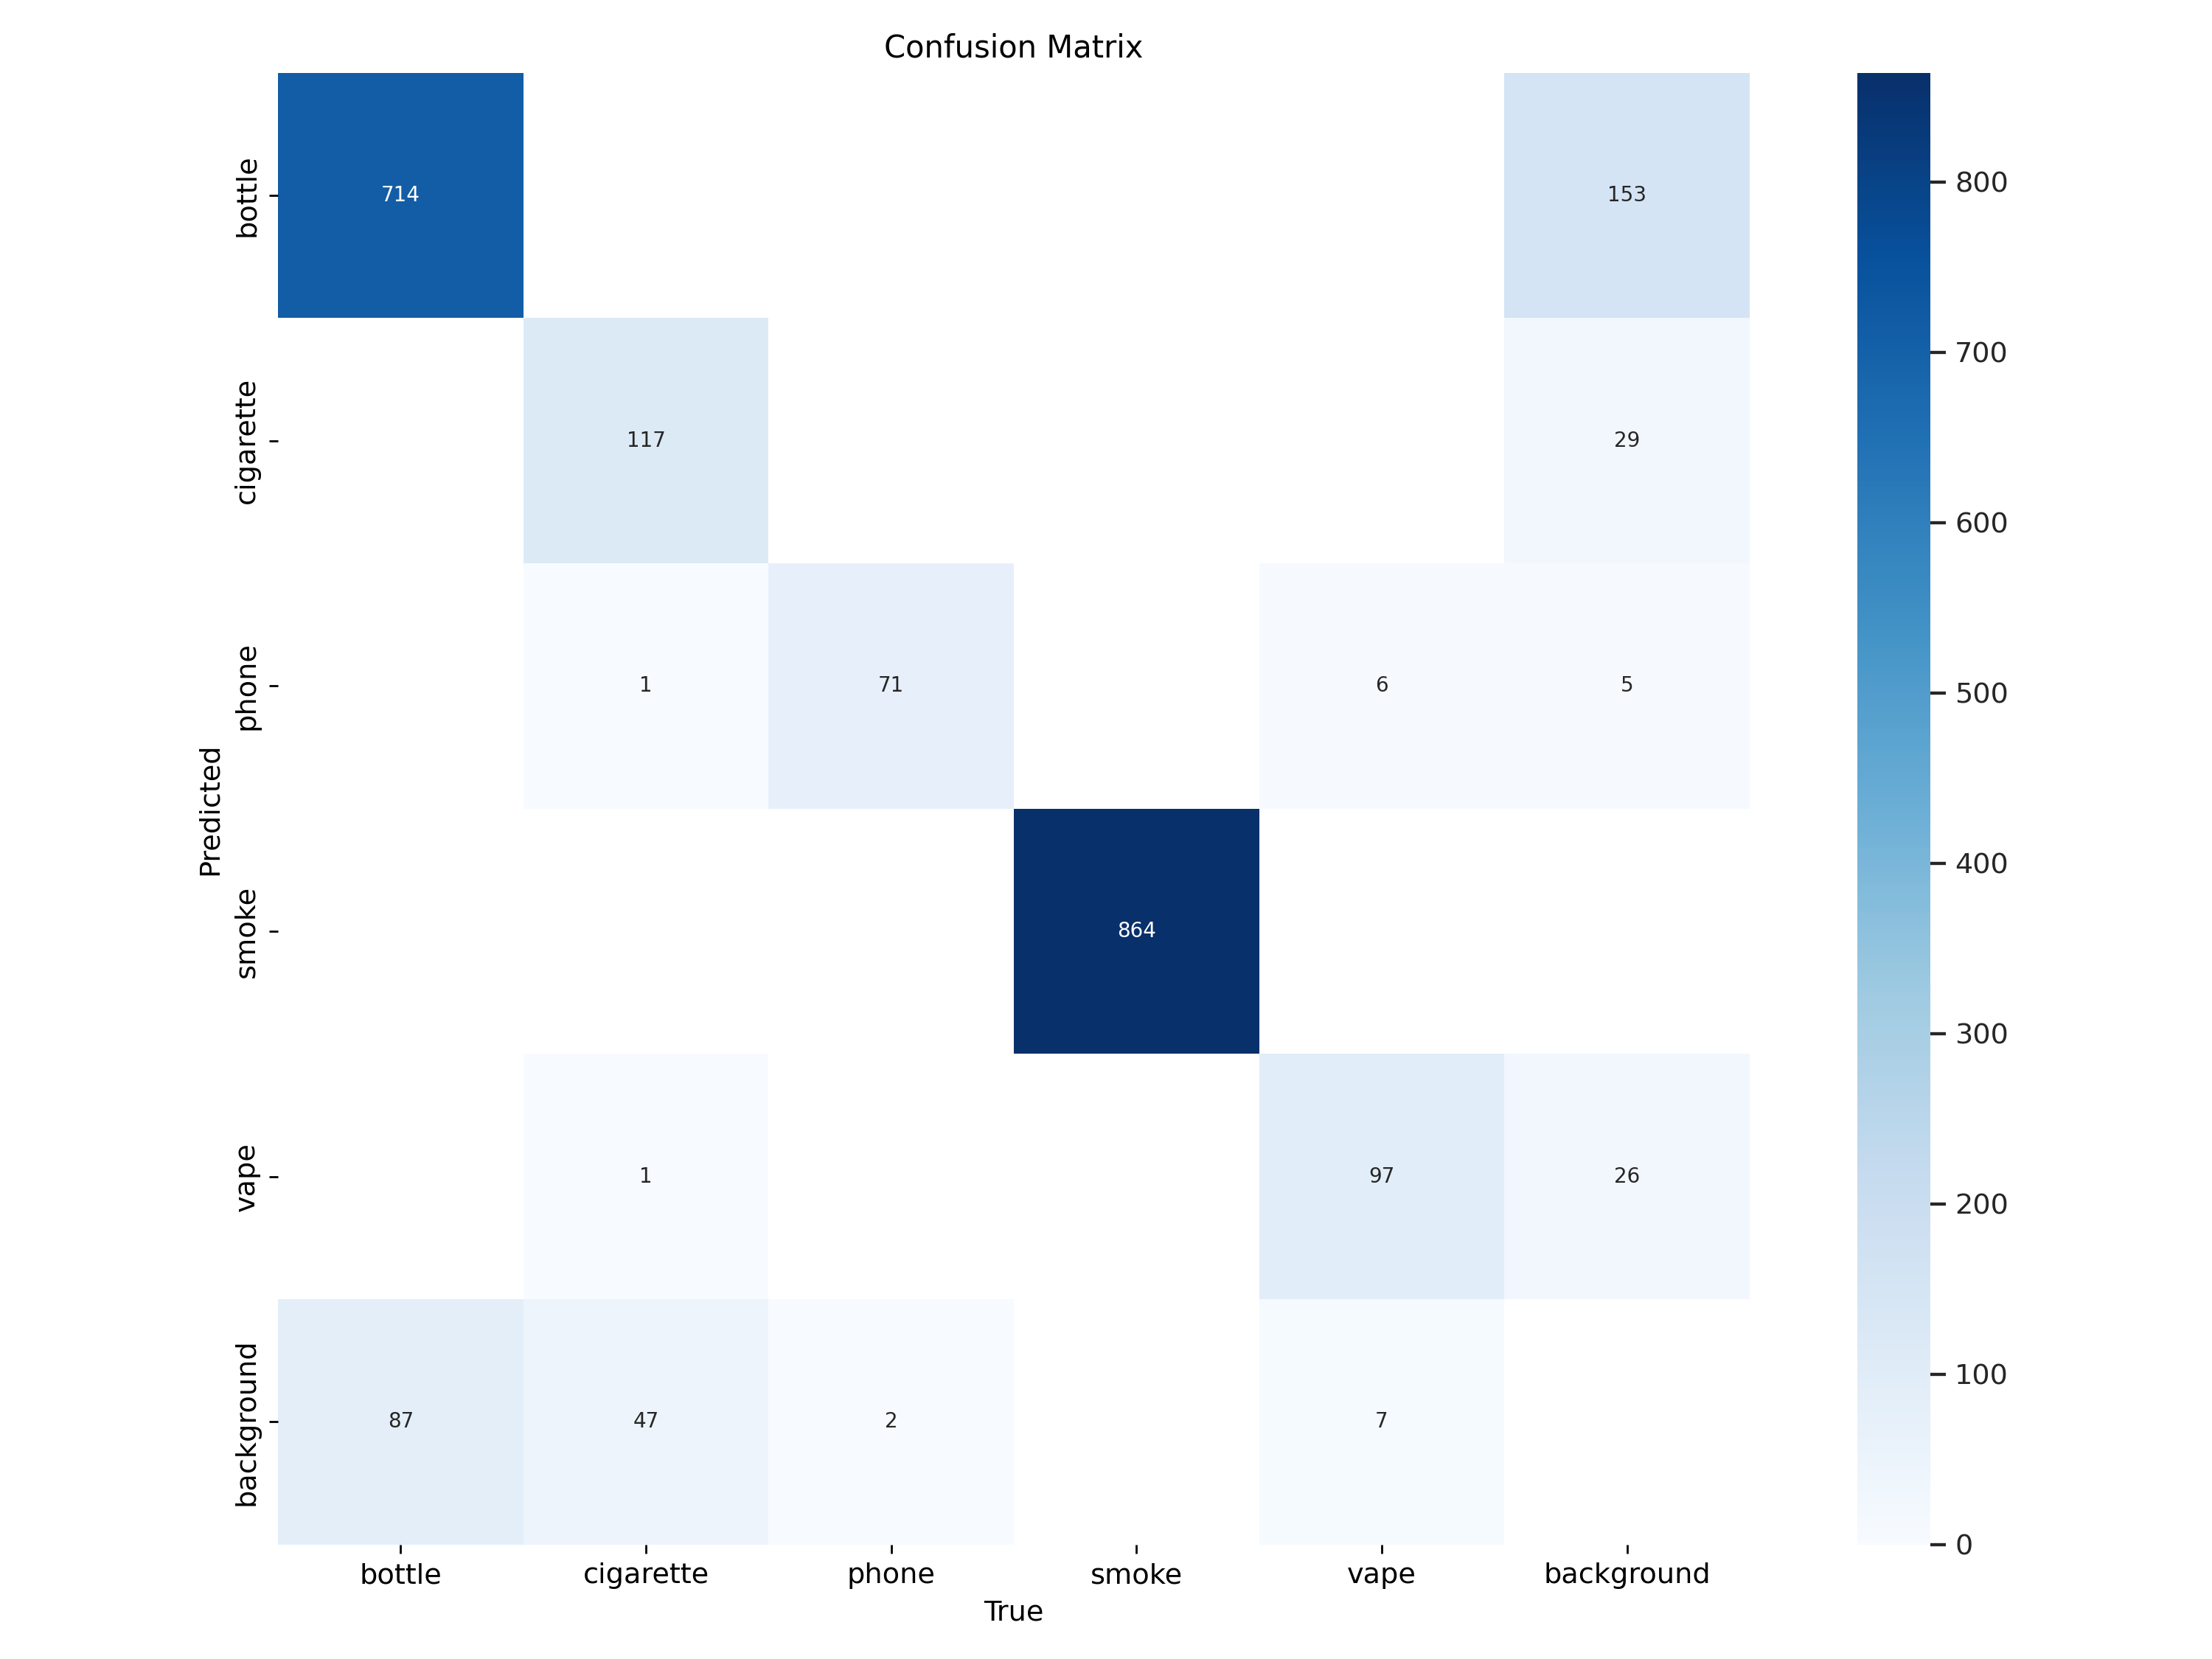

In [8]:
# %cd {HOME}
Image(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=640)

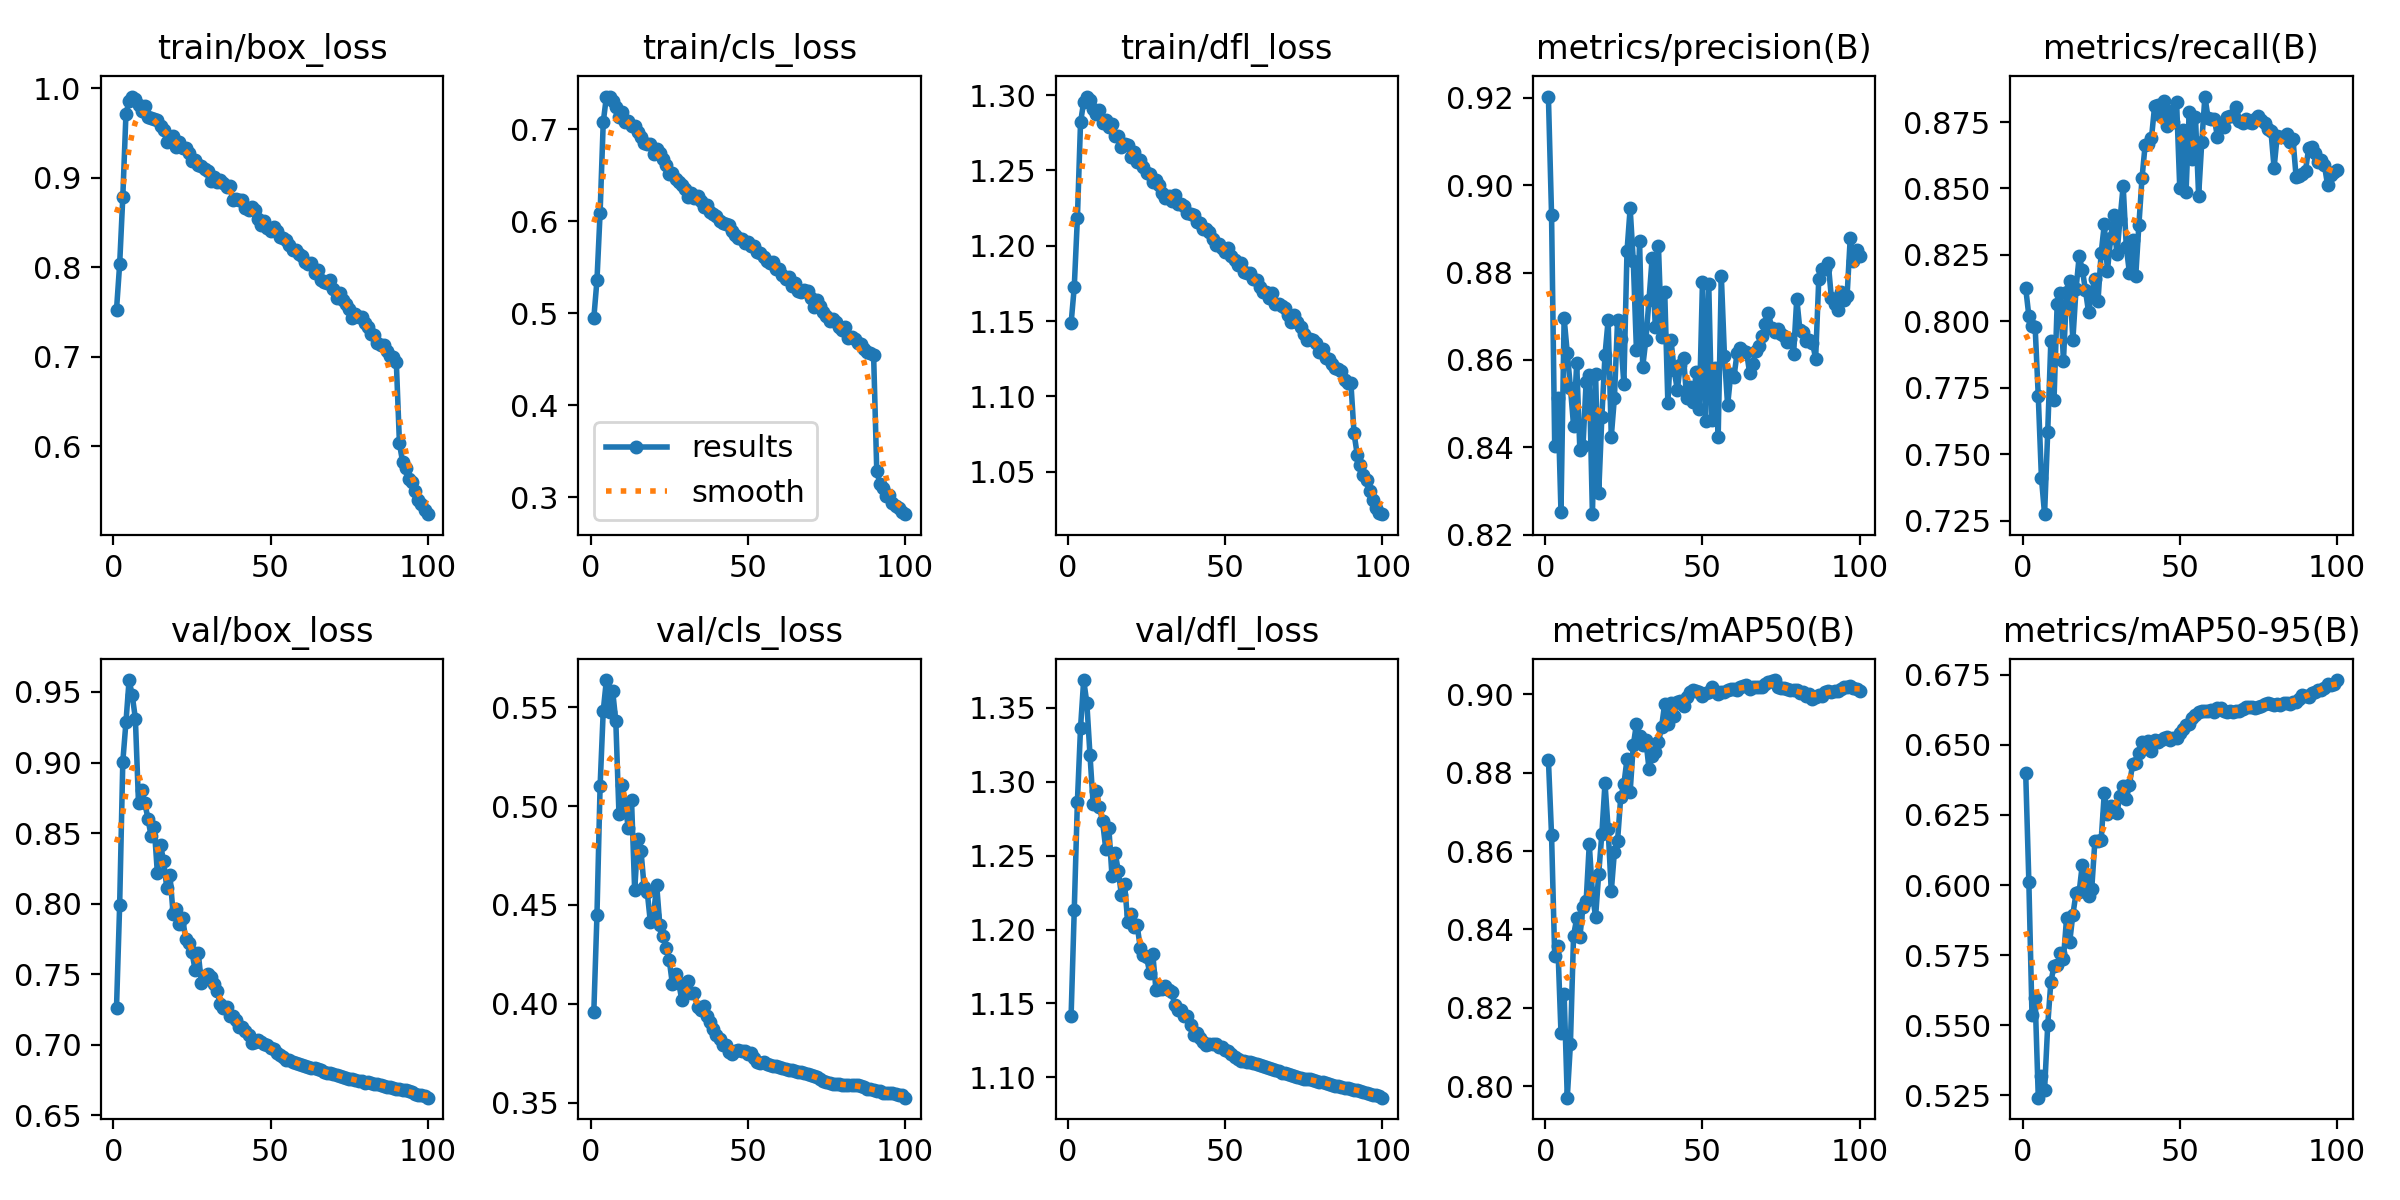

In [9]:
# %cd {HOME}
Image(filename=f'/kaggle/working/runs/detect/train/results.png', width=640)

# Validate with Custom Data

In [10]:
# %cd {HOME}
# {HOME}/runs/detect/train/weights/best.pt
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/driving-monitoring-system-2/valid/labels.cache... 
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 372, len(boxes) = 2014. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1392       2014      0.885      0.858      0.901      0.673
                bottle       1392        801      0.898       0.85      0.919      0.702
             cigarette       1392        166      0.839      0.626      0.709      0.404
                 phone       1392         73      0.869      0.959      0.957       0.71
                 smoke       1392 

# Inference with Custom Data

In [11]:
# %cd {HOME}
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/525 /kaggle/working/driving-monitoring-system-2/test/images/-105_jpg.rf.36fd0450f7f3d4b7abc807b6056cf1ff.jpg: 640x640 2 vapes, 7.9ms
image 2/525 /kaggle/working/driving-monitoring-system-2/test/images/-109_jpg.rf.64c544ad0ab0325ddfad27bca488b386.jpg: 640x640 1 bottle, 8.1ms
image 3/525 /kaggle/working/driving-monitoring-system-2/test/images/-1114_png_jpg.rf.65fa613857c6dd3e76a27603447bb108.jpg: 640x640 2 phones, 7.9ms
image 4/525 /kaggle/working/driving-monitoring-system-2/test/images/-11_jpg.rf.b0c843e9a587d77b7085ed576d2c900c.jpg: 640x640 3 bottles, 7.9ms
image 5/525 /kaggle/working/driving-monitoring-system-2/test/images/-160_jpg.rf.d70d00b24683855f932f0e1ca6e073a0.jpg: 640x640 3 bottles, 7.9ms
image 6/525 /kaggle/working/driving-monitoring-system-2/test/images/-170_jpg.rf.90a1fc14f02b2ed4ad29c22eb0b72

In [12]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source='https://github.com/Braincore-C24-MS02/ML-Development/blob/main/dataset/video/driver_face_dataset.mp4'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

153kB [00:00, 6.80MB/s]
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x5a663f67ee00] moov atom not found
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
